In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data.csv')




1a) Date string to numbers [5 pts]
Now, let's overview the dataframe. Using .head() on the dataframe, we can see the first 5 rows of the data. You can specify number of rows as argument then it will show those number of rows. similarly, .tail() gives the last 5 rows by default. You can see the columns names, but not all columns are displayed if there are too many columns.
 
The column 'date' is the date sold (with some black timestamp as well), and the data is string type (Note that sometimes data tables may have date/time columns as datetime object types. In this example data, it has a string type). We will extract year and month information from the string. In the data frame df, let's create new features 'sales_year' and 'sales_month' using 'date' column.

 

In this case, when we inspect the 'date' column, it is a string object, so we can slice the year and month from the string. Also, we'd like to convert the extracted year and month strings to ingeters.

In [2]:
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df['sales_year'] = df['date'].apply(lambda x: int(x[0:4]))
df['sales_month'] = df['date'].apply(lambda x: int(x[4:6]))

Now, let's count how many sales occurred in each month and each year. We can use .groupby() function to group by 'sales_month' and 'sales_year' as shown below.

In [4]:
print(df.groupby('sales_year')['id'].count())
print(df.groupby('sales_month')['id'].count())



sales_year
2014    14633
2015     6980
Name: id, dtype: int64
sales_month
1      978
2     1250
3     1875
4     2231
5     2414
6     2180
7     2211
8     1940
9     1774
10    1878
11    1411
12    1471
Name: id, dtype: int64


uestion 1a-1. Based on the output from above cell, which month has the most number of sales?


In [5]:
maxMnth = df.groupby('sales_month')['id'].count().idxmax()
print(maxMnth)

5


Question 1a-2. Which months has the least number of sales?

In [6]:
minMnth = df.groupby('sales_month')['id'].count().idxmin()
print(minMnth)



1


1b) Variable types [5 pts]
Inspect each feature's data type and variable type. What is the best description for the variable type of following features? Update the string to 'numeric' or 'categorical'.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
for c in df.columns[2:]:
    print(c, df[c].unique())

price [ 221900.  538000.  180000. ...  610685. 1007500.  402101.]
bedrooms [ 3  2  4  5  1  6  7  0  8  9 11 10 33]
bathrooms [1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]
sqft_living [1180 2570  770 ... 3087 3118 1425]
sqft_lot [ 5650  7242 10000 ...  5813  2388  1076]
floors [1.  2.  1.5 3.  2.5 3.5]
waterfront [0 1]
view [0 3 4 2 1]
condition [3 5 4 1 2]
grade [ 7  6  8 11  9  5 10 12  4  3 13  1]
sqft_above [1180 2170  770 1050 1680 3890 1715 1060 1890 1860  860 1430 1370 1810
 1980 1600 1200 1250 2330 2270 1070 2450 1710 1750 1400  790 2570 2320
 1190 1510 1090 1280  930 2360  890 2620 2600 3595 1570  920 3160  990
 2290 2165 1640 1000 2130 2830 2250 2420 3250 1850 1590 1260 2519 1540
 1110 1770 2720 2240 3070 2380 2390  880 1040  910 3450 2350 1900 1010
  960 2660 1610  765 3520 1290 1960 1160 1210 1270 1440 2190 2920 1460
 1170 1240 3140 2030 2310  700 1080 2520 2780 1560 

In [9]:
from sklearn.preprocessing import OneHotEncoder
colsOneHot = ['waterfront', 'floors', 'view', 'condition', 'grade', 'bedrooms', 'bathrooms','sales_year', 'sales_month']

ohe = OneHotEncoder(sparse_output=False)
dfenc = ohe.fit_transform(df[colsOneHot])
dfencdf = pd.DataFrame(dfenc, columns=ohe.get_feature_names_out(colsOneHot))
onedf = pd.concat([df.drop(columns=colsOneHot, axis=1).reset_index(drop=True), dfencdf.reset_index(drop=True)], axis=1)


1c) Drop features [5 pts]
Let's drop features that are unnecessary. id is not a meaningful feature. date string has been coded to sales_month and sales_year, so we can remove date. zipcode can be also removed as it's hard to include in a linear regression model and the location info is included in the lat and long. Drop the features id, date, and zipcode and replace the df.

In [10]:
colsToDrop = ['date', 'id', 'zipcode']
onedf = onedf.drop(columns=colsToDrop, axis = 1)
onedf.head()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,...,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,221900.0,1180,5650,1180,0,1955,0,47.5112,-122.257,1340,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,538000.0,2570,7242,2170,400,1951,1991,47.7210,-122.319,1690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,180000.0,770,10000,770,0,1933,0,47.7379,-122.233,2720,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,604000.0,1960,5000,1050,910,1965,0,47.5208,-122.393,1360,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,510000.0,1680,8080,1680,0,1987,0,47.6168,-122.045,1800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


2. More inspection; Correlation and pair plot [5 pts]
2a) Get correlation matrix on the data frame. [5 pts]
Which feature may be the best predictor of price based on the correlation? Answer as a string value (e.g. best_guess_predictor = 'price' or best_guess_predictor = 'yr_built')

In [11]:
onedf.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
sqft_above       0.605567
sqft_living15    0.585379
grade_11         0.357412
                   ...   
bathrooms_1.0   -0.244887
floors_1.0      -0.263588
waterfront_0    -0.266369
grade_7         -0.315803
view_0          -0.359120
Name: price, Length: 98, dtype: float64

2b) Display the correlation matrix as heat map

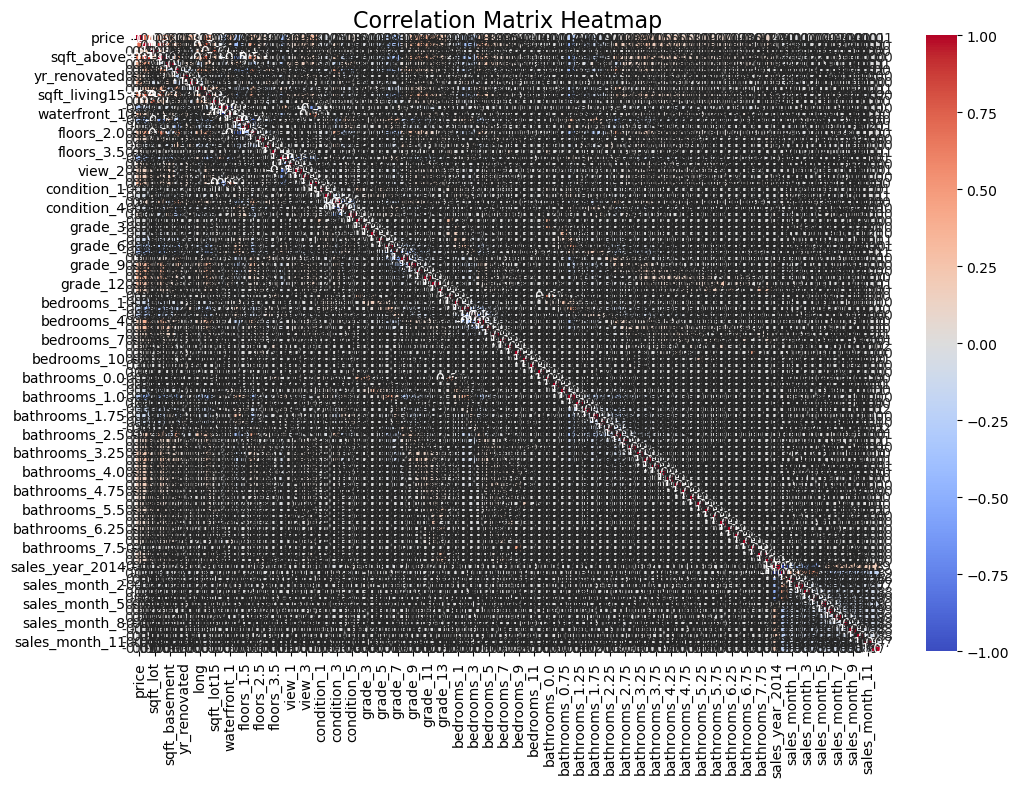

In [12]:
# compute correlation
corr = onedf.corr()

# plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()

c) Pair plot

In [13]:
# plt.figure(figsize=(10,6) )
# sns.pairplot(onedf)


3. Simple linear regression [20 pts]
3a) Data preparation [5 pts]
We will split the data to train and test datasets such that the test dataset is 20% of original data. Use sklearn.model_selection.train_test_split function to split the data frame to X_train and X_test. X_train is 80% of observation randomly chosen. X_test is the rest 20%. Both X_train and X_test are pd.DataFrame object and include 'price' in the table. Note that the train_test_split can handle data frame as well as array.

In [16]:
from sklearn.model_selection import train_test_split
x = onedf.drop(columns=['price'], axis=1)
y = onedf['price']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain, ytrain)
pred = lr.predict(xtest)


3c) Best predictor [10 pts]¶
In question 5a, we picked a best guess predictor for price based on the correlation matrix. Now we will consider whether the best_guess_predictor that we used is still the best.
Print out a list ranking all of the predictors. Then print out a list of the top three predictors in order.

Hint: Linear regression uses adjusted R squared as fit performance. So you can rank by this metric.

What were your top three predictors?
How did you order your list of predictors to select those as the top ones?
Is your top predictor for this section the same as the best guess predictor you selected in question 2a?

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE:", mean_absolute_error(ytest, pred))
print("MSE:", mean_squared_error(ytest, pred))
print("RMSE:", np.sqrt(mean_squared_error(ytest, pred)))
print("R2:", r2_score(ytest, pred))

MAE: 122956.95942572887
MSE: 51513794908.201744
RMSE: 226966.50613736323
R2: 0.6592478157569844


In [21]:
coeffdf = pd.DataFrame({
    'features': x.columns,
    'coeff': lr.coef_
})
coeffdf['coeff'] = coeffdf['coeff'].abs()
coeffdf = coeffdf.sort_values(by='coeff', ascending=False)
coeffdf.head()

,features,coeff
82,bathrooms_8.0,3.676218e+06
81,bathrooms_7.75,3.388491e+06
76,bathrooms_6.0,1.514766e+06
79,bathrooms_6.75,1.123527e+06
39,grade_13,1.081502e+06
